In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

In [10]:
def get_data(images_dir):
    data = []
    
    for class_label, label in enumerate(class_names):
        path = os.path.join(images_dir, label)
        print(path)
        for img in os.listdir(path):
            full_path_image = os.path.join(path, img)
            image = cv2.imread(full_path_image)
            data.append((image, class_label))
                             
    return data

In [11]:
all_train_images = get_data(r'data\archive\Train')

data\archive\Train\A
data\archive\Train\B
data\archive\Train\C
data\archive\Train\D
data\archive\Train\E
data\archive\Train\F
data\archive\Train\G
data\archive\Train\H
data\archive\Train\I
data\archive\Train\K
data\archive\Train\L
data\archive\Train\M
data\archive\Train\N
data\archive\Train\O
data\archive\Train\P
data\archive\Train\Q
data\archive\Train\R
data\archive\Train\S
data\archive\Train\T
data\archive\Train\U
data\archive\Train\V
data\archive\Train\W
data\archive\Train\X
data\archive\Train\Y


In [12]:
X_train = []
X_test = []
y_train = []
y_test = []

In [13]:
for img, label in all_train_images:
    X_train.append(img)
    y_train.append(label)

In [14]:
all_test_images = get_data(r'data\archive\Test')

data\archive\Test\A
data\archive\Test\B
data\archive\Test\C
data\archive\Test\D
data\archive\Test\E
data\archive\Test\F
data\archive\Test\G
data\archive\Test\H
data\archive\Test\I
data\archive\Test\K
data\archive\Test\L
data\archive\Test\M
data\archive\Test\N
data\archive\Test\O
data\archive\Test\P
data\archive\Test\Q
data\archive\Test\R
data\archive\Test\S
data\archive\Test\T
data\archive\Test\U
data\archive\Test\V
data\archive\Test\W
data\archive\Test\X
data\archive\Test\Y


In [15]:
for img, label in all_test_images:
    X_test.append(img)
    y_test.append(label)

In [16]:
# preprocessing images
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255

In [17]:
X_train.shape

(27094, 28, 28, 3)

In [18]:
X_test.shape

(7172, 28, 28, 3)

<AxesSubplot:ylabel='count'>

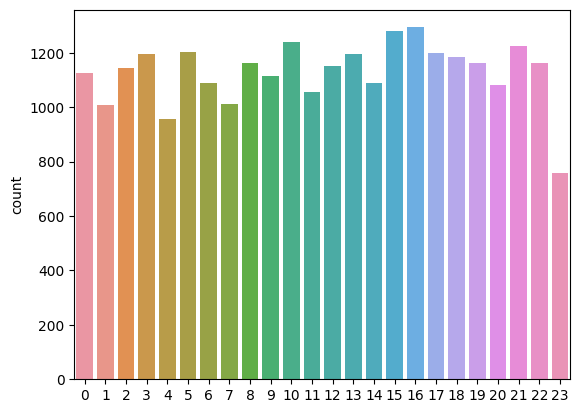

In [23]:
sns.countplot(x=y_train)

In [24]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [90]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout

In [91]:
# create model
model = Sequential()
model.add(Conv2D(24, (3,3), activation="relu", input_shape=(28,28,3)))
model.add(MaxPool2D())

model.add(Conv2D(24, (3,3), activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(24, activation="softmax"))

In [92]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [93]:
from keras.callbacks import EarlyStopping

In [94]:
# use early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=50)

In [95]:
# train model
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/400
847/847 [==============================] - 20s 23ms/step - loss: 2.0149 - accuracy: 0.3585 - val_loss: 1.0576 - val_accuracy: 0.6464
Epoch 2/400
847/847 [==============================] - 15s 18ms/step - loss: 0.8912 - accuracy: 0.6877 - val_loss: 0.6138 - val_accuracy: 0.7780
Epoch 3/400
847/847 [==============================] - 17s 20ms/step - loss: 0.5757 - accuracy: 0.7956 - val_loss: 0.5187 - val_accuracy: 0.8122
Epoch 4/400
847/847 [==============================] - 16s 19ms/step - loss: 0.4377 - accuracy: 0.8477 - val_loss: 0.4850 - val_accuracy: 0.8514
Epoch 5/400
847/847 [==============================] - 16s 19ms/step - loss: 0.3585 - accuracy: 0.8761 - val_loss: 0.4043 - val_accuracy: 0.8670
Epoch 6/400
847/847 [==============================] - 16s 19ms/step - loss: 0.2894 - accuracy: 0.8988 - val_loss: 0.3989 - val_accuracy: 0.8740
Epoch 7/400
847/847 [==============================] - 16s 19ms/step - loss: 0.2562 - accuracy: 0.9115 - val_loss: 0.3787 - val_ac

847/847 [==============================] - 18s 22ms/step - loss: 0.0634 - accuracy: 0.9791 - val_loss: 0.3768 - val_accuracy: 0.9184
Epoch 58/400
847/847 [==============================] - 17s 20ms/step - loss: 0.0645 - accuracy: 0.9800 - val_loss: 0.4649 - val_accuracy: 0.9101
Epoch 59/400
847/847 [==============================] - 17s 21ms/step - loss: 0.0541 - accuracy: 0.9821 - val_loss: 0.4797 - val_accuracy: 0.9046
Epoch 60/400
847/847 [==============================] - 17s 20ms/step - loss: 0.0634 - accuracy: 0.9803 - val_loss: 0.3762 - val_accuracy: 0.9281
Epoch 61/400
847/847 [==============================] - 17s 21ms/step - loss: 0.0582 - accuracy: 0.9817 - val_loss: 0.3744 - val_accuracy: 0.9324
Epoch 62/400
847/847 [==============================] - 17s 20ms/step - loss: 0.0540 - accuracy: 0.9827 - val_loss: 0.3596 - val_accuracy: 0.9246
Epoch 63/400
847/847 [==============================] - 18s 21ms/step - loss: 0.0597 - accuracy: 0.9815 - val_loss: 0.3482 - val_accuracy

In [96]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

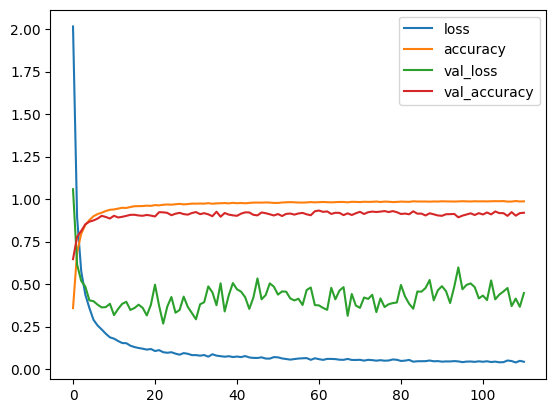

In [97]:
losses.plot()

In [98]:
test_loss = model.evaluate(X_test, y_test)

225/225 [==============================] - 3s 12ms/step - loss: 0.4470 - accuracy: 0.9193


In [99]:
predictions = model.predict(X_test)

225/225 [==============================] - 2s 9ms/step


In [100]:
prediction_labels = np.argmax(predictions, axis = 1)

In [101]:
from sklearn.metrics import classification_report

In [102]:
print(classification_report(y_test, prediction_labels))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       331
           1       1.00      0.91      0.95       432
           2       0.82      0.98      0.90       310
           3       0.84      0.89      0.86       245
           4       1.00      0.96      0.98       498
           5       1.00      1.00      1.00       247
           6       0.95      0.92      0.93       348
           7       0.89      0.97      0.93       436
           8       0.85      0.82      0.83       288
           9       0.94      0.92      0.93       331
          10       0.96      0.95      0.96       209
          11       0.93      0.97      0.95       394
          12       1.00      0.89      0.94       291
          13       0.87      0.74      0.80       246
          14       0.95      1.00      0.98       347
          15       0.99      1.00      0.99       164
          16       0.70      0.83      0.76       144
          17       0.93    

In [103]:
single_image_test_should_return_0 = X_test[1]

In [104]:
single_image_test_should_return_0.shape

(28, 28, 3)

In [105]:
single_image_test = (np.expand_dims(single_image_test_should_return_0,0))
single_image_test.shape

(1, 28, 28, 3)

In [106]:
prediction_single_image_should_return_0 = model.predict(single_image_test)

1/1 [==============================] - 0s 56ms/step


In [107]:
print(prediction_single_image_should_return_0)

[[9.9999404e-01 2.5354966e-18 3.5846990e-14 2.4318240e-14 1.0973308e-10
  1.0126041e-15 8.0251979e-22 6.7834811e-13 1.9633303e-06 7.5014625e-27
  2.8275950e-15 5.3013648e-12 1.2656902e-09 2.8174632e-15 2.7808662e-18
  1.7724700e-15 1.9981677e-25 4.0127939e-06 2.5520900e-18 4.7623102e-35
  5.0894984e-31 6.5075463e-27 1.2735686e-15 9.6295427e-10]]


In [108]:
# prediction value
np.argmax(prediction_single_image)

0

In [109]:
# Test the model with my own image
# read image into grayscale
gray_image_test = cv2.imread(r'tests\images\test_image_0_A.jpg', 0)
gray_image_test.shape

(454, 514)

In [110]:
# transform the grayscale image to 3 canal
gray_image_test = cv2.merge((gray_image_test, gray_image_test, gray_image_test))

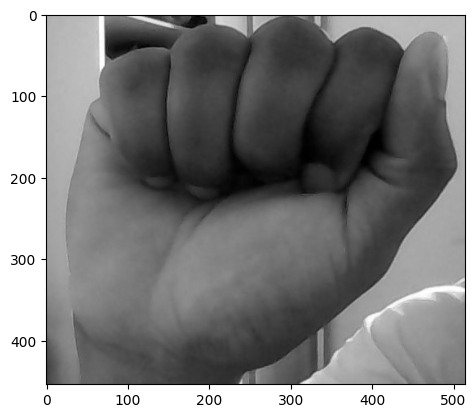

In [111]:
plt.imshow(gray_image_test)

In [112]:
# resize the original gray image
gray_image_test_resized = cv2.resize(gray_image_test, (28, 28), interpolation= cv2.INTER_LINEAR)

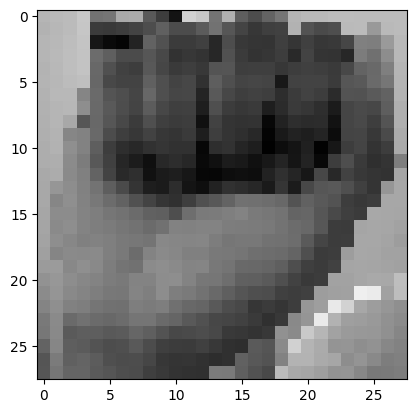

In [113]:
plt.imshow(gray_image_test_resized)

In [114]:
# normalize the image
gray_image_test_normalized = gray_image_test_resized / 255
gray_image_test_normalized.shape

(28, 28, 3)

In [115]:
gray_image_test_normalized

array([[[0.70980392, 0.70980392, 0.70980392],
        [0.7254902 , 0.7254902 , 0.7254902 ],
        [0.73333333, 0.73333333, 0.73333333],
        ...,
        [0.73333333, 0.73333333, 0.73333333],
        [0.73333333, 0.73333333, 0.73333333],
        [0.73333333, 0.73333333, 0.73333333]],

       [[0.69803922, 0.69803922, 0.69803922],
        [0.71764706, 0.71764706, 0.71764706],
        [0.73333333, 0.73333333, 0.73333333],
        ...,
        [0.6       , 0.6       , 0.6       ],
        [0.7254902 , 0.7254902 , 0.7254902 ],
        [0.73333333, 0.73333333, 0.73333333]],

       [[0.70980392, 0.70980392, 0.70980392],
        [0.72156863, 0.72156863, 0.72156863],
        [0.74117647, 0.74117647, 0.74117647],
        ...,
        [0.49411765, 0.49411765, 0.49411765],
        [0.60392157, 0.60392157, 0.60392157],
        [0.72156863, 0.72156863, 0.72156863]],

       ...,

       [[0.38823529, 0.38823529, 0.38823529],
        [0.5254902 , 0.5254902 , 0.5254902 ],
        [0.36862745, 0

In [116]:
gray_image_test_normalized = (np.expand_dims(gray_image_test_normalized,0))
gray_image_test_normalized.shape

(1, 28, 28, 3)

In [117]:
# Prediction
prediction_image_should_return_0_A = model.predict(gray_image_test_normalized)

1/1 [==============================] - 1s 635ms/step


In [118]:
print(prediction_image_should_return_0_A)

[[9.0011185e-01 2.3217681e-11 5.9916661e-10 3.1134223e-12 3.5227876e-07
  3.1534248e-07 2.4293903e-14 4.4866728e-12 5.8988794e-03 5.2769388e-13
  1.3192641e-03 6.4498643e-08 9.2418872e-02 1.9408002e-09 4.1686038e-12
  2.3149782e-09 7.9582932e-23 9.3517092e-06 1.9013981e-11 1.6311871e-21
  3.4510157e-18 1.7467346e-12 6.4489192e-11 2.4103683e-04]]


In [119]:
# Final prediction
np.argmax(prediction_image_should_return_0_A)

0

In [120]:
# save the model
from tensorflow.keras.models import load_model

In [121]:
model.save('sign_language_interpreter_model.h5')

In [122]:
# Test saved model
sign_model = load_model('sign_language_interpreter_model.h5')

In [123]:
prediction_test_with_saved_model_should_return_0_A = sign_model.predict(gray_image_test_normalized)

1/1 [==============================] - 0s 426ms/step


In [125]:
print(prediction_test_with_saved_model_should_return_0_A)

[[9.0011185e-01 2.3217681e-11 5.9916661e-10 3.1134223e-12 3.5227876e-07
  3.1534248e-07 2.4293903e-14 4.4866728e-12 5.8988794e-03 5.2769388e-13
  1.3192641e-03 6.4498643e-08 9.2418872e-02 1.9408002e-09 4.1686038e-12
  2.3149782e-09 7.9582932e-23 9.3517092e-06 1.9013981e-11 1.6311871e-21
  3.4510157e-18 1.7467346e-12 6.4489192e-11 2.4103683e-04]]


In [126]:
# Final prediction
np.argmax(prediction_test_with_saved_model_should_return_0_A)

0